<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib
import tensorflow as tf
from keras.callbacks import EarlyStopping

from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.duplicated().sum()

np.int64(0)

<h2>EDA</h2>

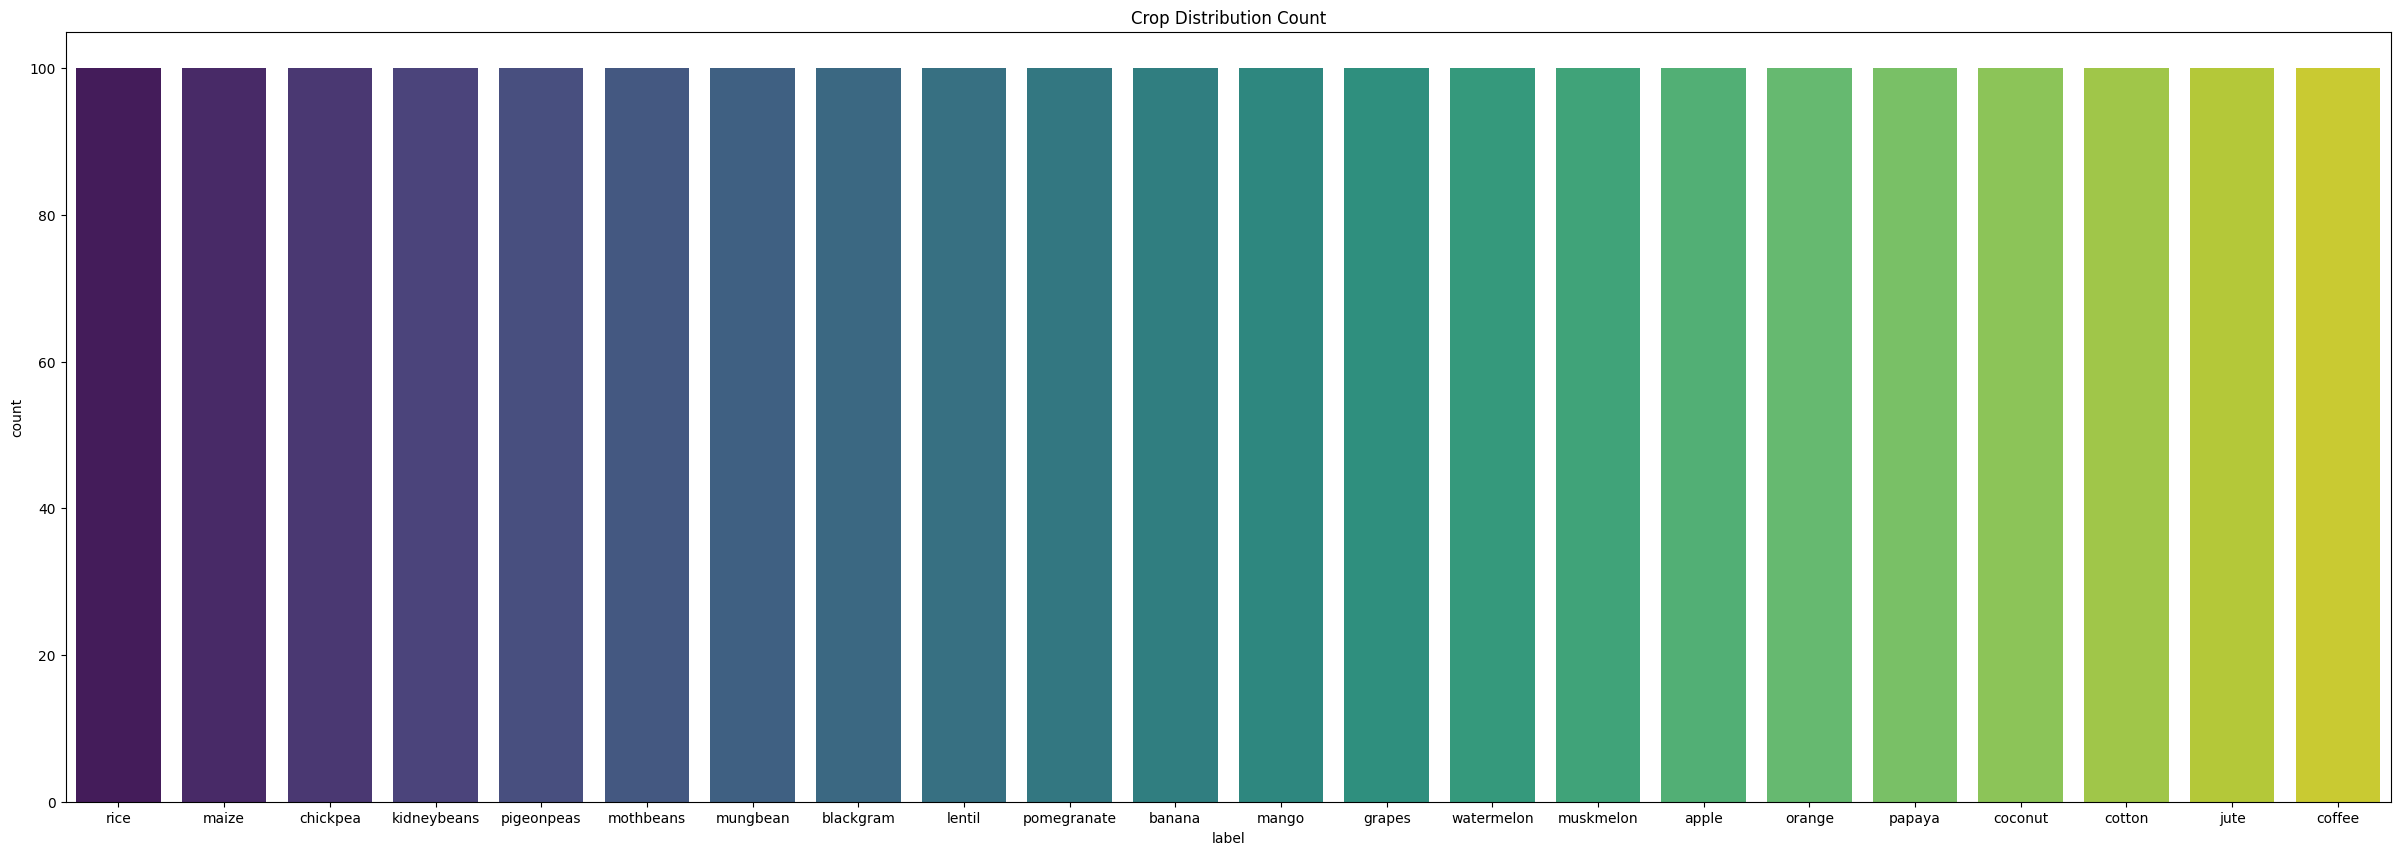

In [8]:
plt.figure(figsize=(30,10))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Crop Distribution Count')
plt.show();

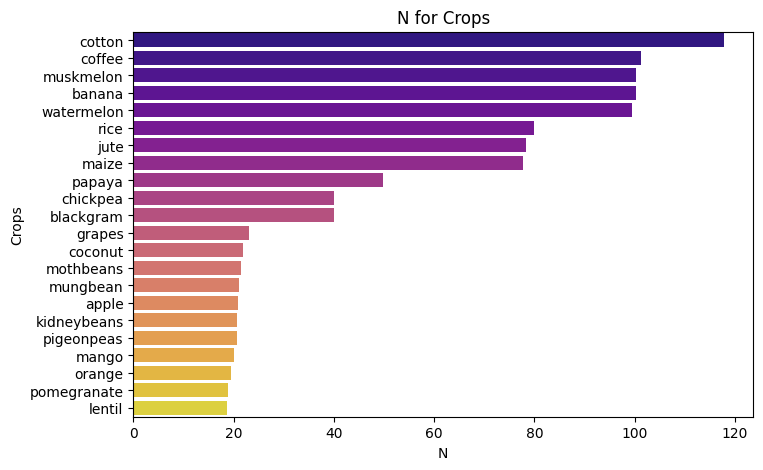

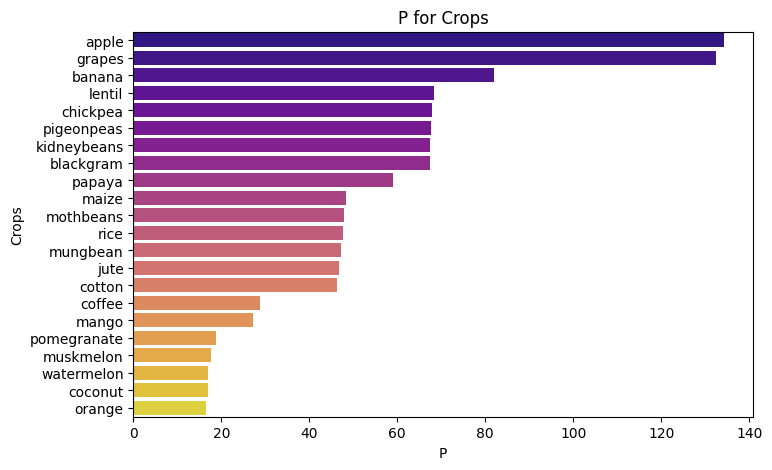

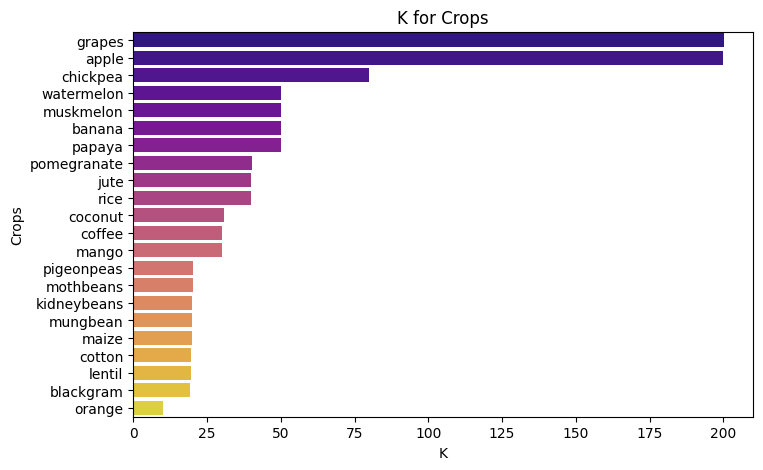

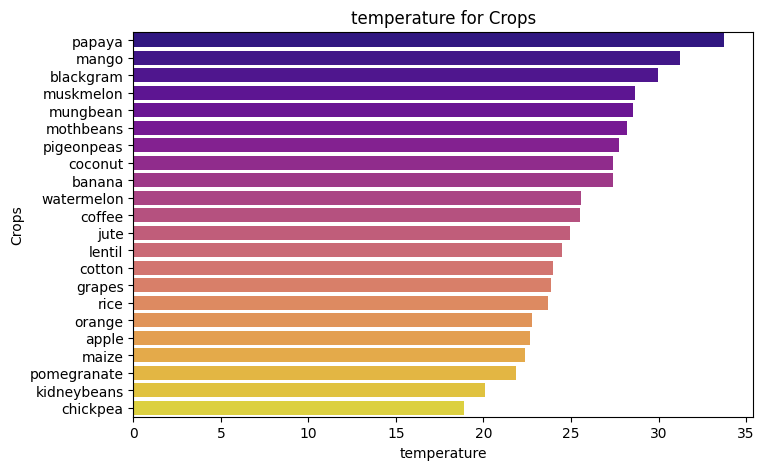

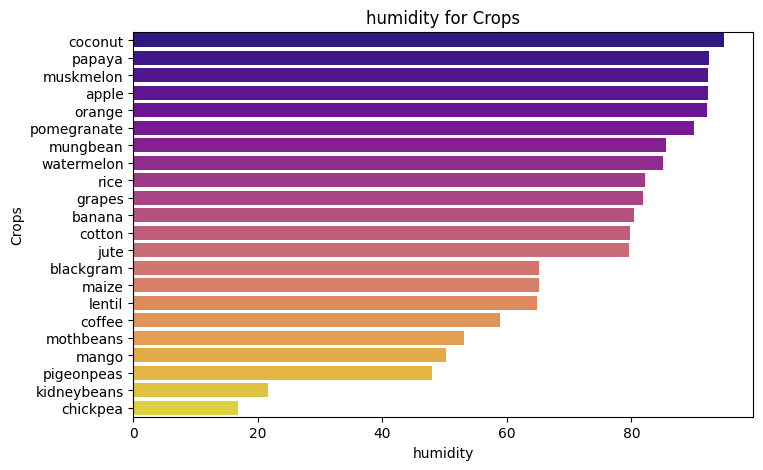

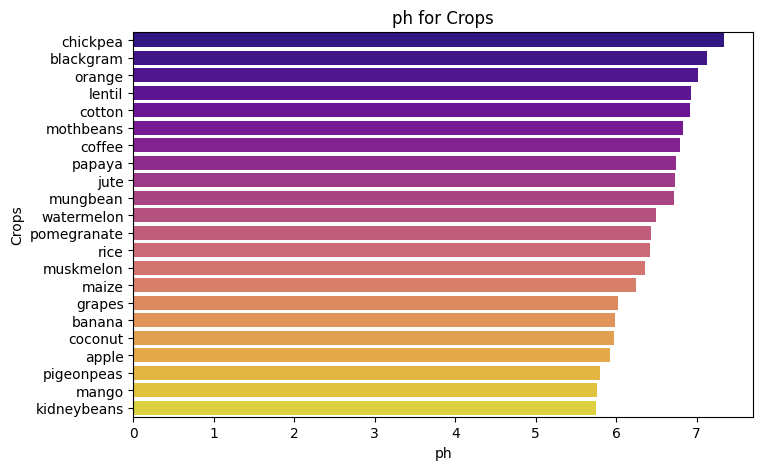

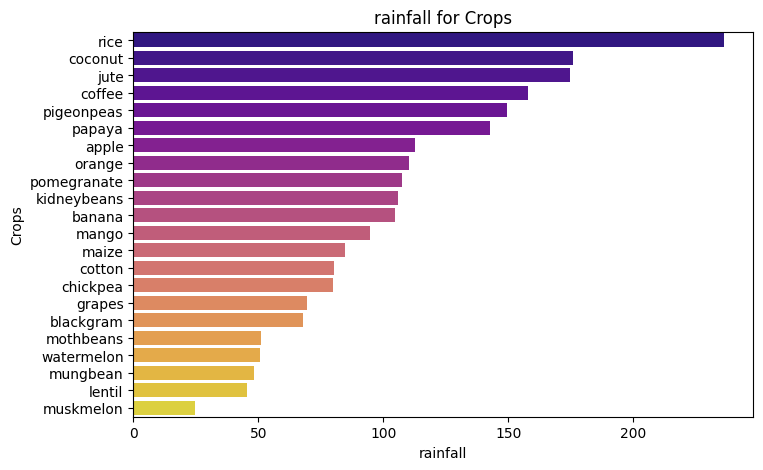

In [9]:
crop_data = {}

for col in df.columns:
    if col != 'label':
        crop_data[col] = df.groupby('label')[col].mean().reset_index()
        crop_data[col] = crop_data[col].sort_values(by=col, ascending=False)

        plt.figure(figsize=(8, 5))
        sns.barplot(y='label', x=col, data=crop_data[col], palette='plasma')

        plt.ylabel('Crops')
        plt.title(f"{col} for Crops")
        plt.xlabel(col)

        plt.show();

<h2>Data Splitting</h2>

In [10]:
x = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)

label_mapping = dict(zip(le.transform(le.classes_), le.classes_))
label_mapping

{np.int64(0): 'apple',
 np.int64(1): 'banana',
 np.int64(2): 'blackgram',
 np.int64(3): 'chickpea',
 np.int64(4): 'coconut',
 np.int64(5): 'coffee',
 np.int64(6): 'cotton',
 np.int64(7): 'grapes',
 np.int64(8): 'jute',
 np.int64(9): 'kidneybeans',
 np.int64(10): 'lentil',
 np.int64(11): 'maize',
 np.int64(12): 'mango',
 np.int64(13): 'mothbeans',
 np.int64(14): 'mungbean',
 np.int64(15): 'muskmelon',
 np.int64(16): 'orange',
 np.int64(17): 'papaya',
 np.int64(18): 'pigeonpeas',
 np.int64(19): 'pomegranate',
 np.int64(20): 'rice',
 np.int64(21): 'watermelon'}

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2>Machine Learning</h2>

In [13]:
LR_model =LogisticRegression(random_state=42)
LR_model.fit(X_train, y_train)
print('Training score:',LR_model.score(X_train, y_train))
print('Testing score:',LR_model.score(X_test,y_test))

Training score: 0.977840909090909
Testing score: 0.9636363636363636


In [14]:
y_pred = LR_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.96    

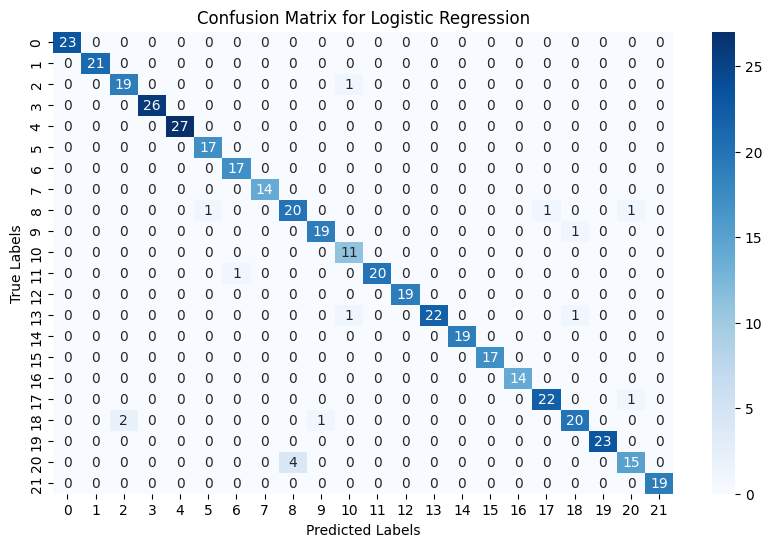

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [16]:
RF_model =RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
print('Training score:',RF_model.score(X_train, y_train))
print('Testing score:',RF_model.score(X_test,y_test))

Training score: 1.0
Testing score: 0.9931818181818182


In [17]:
y_pred2 = RF_model.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

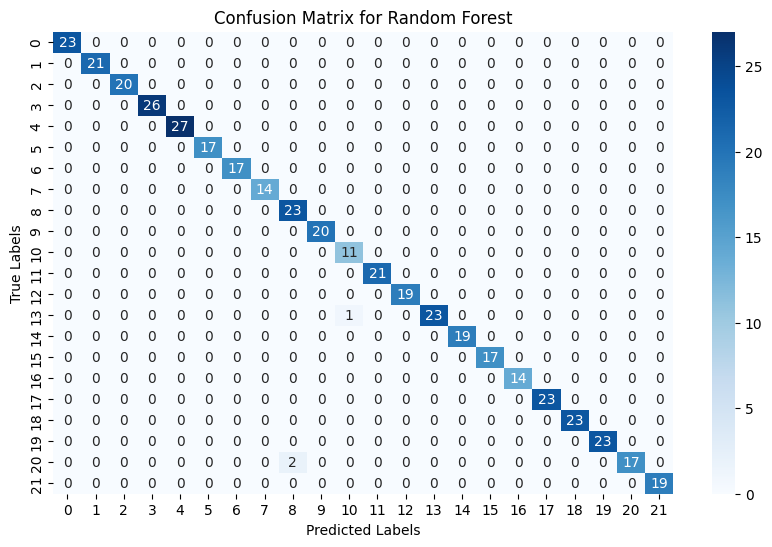

In [18]:
cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [19]:
# Save the ML models
joblib.dump(LR_model, 'LR_model.pkl')
print("LR model saved successfully!")

joblib.dump(RF_model, 'RF_model.pkl')
print("RF model saved successfully!")

LR model saved successfully!
RF model saved successfully!


<h2>Deep Learning</h2>

In [20]:
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),  # 1D CNN
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(22, activation='softmax')
])


# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = CNN_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1712 - loss: 2.8635 - val_accuracy: 0.5636 - val_loss: 1.6250
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5662 - loss: 1.4819 - val_accuracy: 0.7705 - val_loss: 0.8051
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6992 - loss: 0.9150 - val_accuracy: 0.8023 - val_loss: 0.5947
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.7487 - val_accuracy: 0.8614 - val_loss: 0.4626
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.6025 - val_accuracy: 0.8614 - val_loss: 0.4085
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8239 - loss: 0.4920 - val_accuracy: 0.8727 - val_loss: 0.3722
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8630 - loss: 0.4128 - val_accuracy: 0.8636 - val_loss: 0.3480
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3570 - val_accuracy: 0.

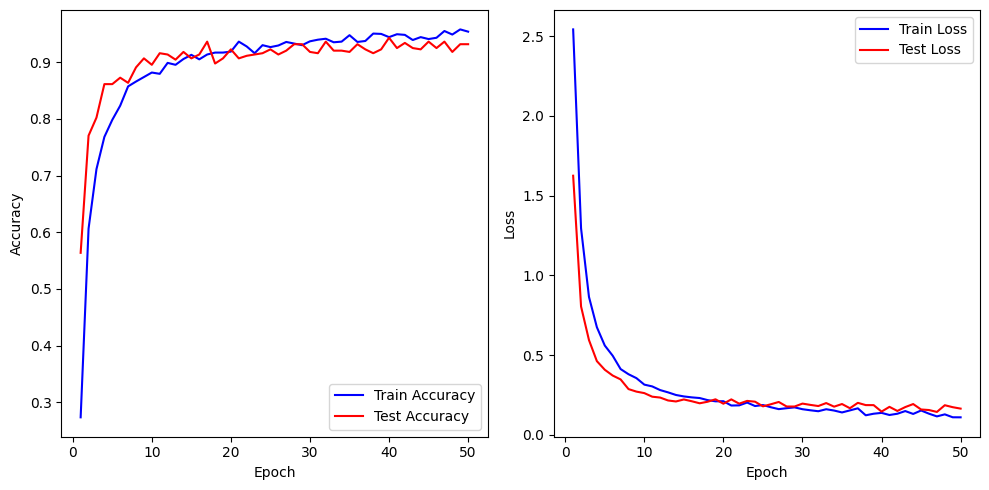

In [21]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [22]:
y_pred = CNN_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [23]:
cr_CNN = classification_report(y_test, y_pred_classes)
print(cr_CNN)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.88      0.75      0.81        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.71      0.87      0.78        23
           9       0.95      1.00      0.98        20
          10       0.48      0.91      0.62        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.71      0.83        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

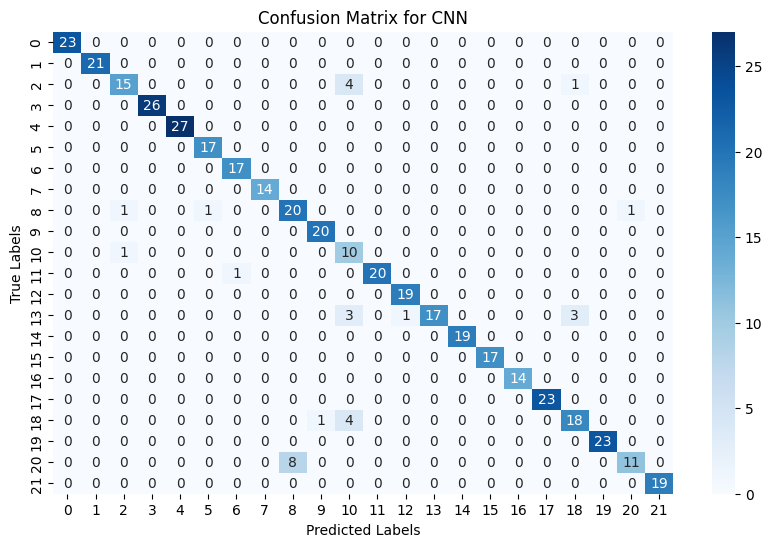

In [24]:
cm_CNN = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_CNN, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for CNN")
plt.show()

In [25]:
# Save the CNN model
CNN_model.save('CNN_model.keras')
print("CNN model saved successfully!")

CNN model saved successfully!


<h2>Machine Learning vs Deep Learning</h2>

In [26]:
# Load Models
LR_model = joblib.load('LR_model.pkl')
RF_model = joblib.load('RF_model.pkl')
CNN_model = load_model("CNN_model.keras")

# User Input
N = int(input("Enter the Nitrogen content in the soil (in mg/kg): "))
P = int(input("Enter the Phosphorus content in the soil (in mg/kg): "))
K = int(input("Enter the Potassium content in the soil (in mg/kg): "))
temperature = float(input("Enter the average temperature in °C: "))
humidity = float(input("Enter the average relative humidity in %: "))
pH = float(input("Enter the soil pH value: "))
rainfall = float(input("Enter the rainfall in mm: "))

print(f"N: {N}mg/kg, P: {P}mg/kg, K: {K}mg/kg, Temperature: {temperature}°C, Humidity: {humidity}%, pH: {pH}, Rainfall: {rainfall}mm")

new_data = [[N, P, K, temperature, humidity, pH, rainfall]]
new_data_scaled = sc.transform(new_data)

LR_prediction = LR_model.predict(new_data_scaled)
LR_prediction = le.inverse_transform(LR_prediction)
RF_prediction = RF_model.predict(new_data_scaled)
RF_prediction = le.inverse_transform(RF_prediction)

new_data_scaled = np.expand_dims(new_data_scaled, axis=-1)
y_pred = CNN_model.predict(new_data_scaled)
CNN_prediction = np.argmax(y_pred, axis=1)
CNN_prediction = le.inverse_transform(CNN_prediction)

print("Machine Learning:")
print("LR Suggested Crop:", LR_prediction)
print("RF Suggested Crop:", RF_prediction)
print("Deep Learning:")
print("CNN Suggested Crop:", CNN_prediction)

Enter the Nitrogen content in the soil (in mg/kg): 17
Enter the Phosphorus content in the soil (in mg/kg): 136
Enter the Potassium content in the soil (in mg/kg): 96
Enter the average temperature in °C: 23
Enter the average relative humidity in %: 50
Enter the soil pH value: 5
Enter the rainfall in mm: 50
N: 17mg/kg, P: 136mg/kg, K: 96mg/kg, Temperature: 23.0°C, Humidity: 50.0%, pH: 5.0, Rainfall: 50.0mm
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Machine Learning:
LR Suggested Crop: ['grapes']
RF Suggested Crop: ['grapes']
Deep Learning:
CNN Suggested Crop: ['grapes']
